# RESUME CLASSIFICATION EDA

In [1]:
# Importing the OS module to interact with the operating system
import os

In [2]:
# Getting the current working directory
os.getcwd()

'C:\\Users\\revat\\Desktop\\Excelr\\Project2'

In [3]:
!python -m pip install --upgrade pip
!pip install wordcloud


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\revat\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 106, in _run_wrapper
    status = _inner_run()
  File "C:\Users\revat\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 97, in _inner_run
    return self.run(options, args)
  File "C:\Users\revat\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "C:\Users\revat\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 484, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "C:\Users\revat\anaconda3\lib\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File "C:\Users\revat\anaconda3\lib\site-packages\pip\_vendor\packaging\version.py", line 56, in parse
    return Version(version)
  File "C:\Users\revat\anaconda3\lib\site-packages

ERROR: Exception:
Traceback (most recent call last):
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 106, in _run_wrapper
    status = _inner_run()
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 97, in _inner_run
    return self.run(options, args)
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 484, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version


    return parse_version(self._dist.version)
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_vendor\packaging\version.py", line 56, in parse
    return Version(version)
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_vendor\packaging\version.py", line 202, in __init__
    raise InvalidVersion(f"Invalid version: {version!r}")
pip._vendor.packaging.version.InvalidVersion: Invalid version: '4.0.0-unsupported'


In [4]:
# Importing essential libraries
import pandas as pd   # Data handling and analysis
import seaborn as sns   # Statistical data visualization
from matplotlib import pyplot as plt   # General plotting
import os
import warnings   # Handling warning messages
warnings.filterwarnings('ignore')
# Importing NLP-related libraries
import re   # Regular expressions for text processing
import nltk   # Natural Language Toolkit for NLP tasks
import string   # Handling punctuation
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [5]:
# List all files and directories inside the specified folder
os.listdir(r'C:\\Users\\revat\\Desktop\\Excelr\\Project2\\Dataset\Resumes_Docx')

['Peoplesoft',
 'Peoplesoft Resume',
 'React Developer',
 'SQL Developer',
 'workday']

In [6]:
!pip install python-docx


ERROR: Exception:
Traceback (most recent call last):
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 106, in _run_wrapper
    status = _inner_run()
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 97, in _inner_run
    return self.run(options, args)
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 484, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_vendor\packaging\version.py", line 56, in parse
    return Version(version)
  File "c:\users\revat\anaconda3\lib\site-packages

In [7]:
import os
import docx
import win32com.client

file_path1 = []
category1  = []
directory1 = r'C:\\Users\\revat\\Desktop\\Excelr\\Project2\\Dataset\\Resumes_Docx\Peoplesoft Resume'  

def extract_text_docx(docx_path):
    """Extract text from a .docx file"""
    doc = docx.Document(docx_path)
    return "\n".join([para.text for para in doc.paragraphs])

def extract_text_doc(doc_path):
    """Extract text from a .doc file using pywin32 (Windows only)"""
    word = win32com.client.Dispatch("Word.Application")
    word.Visible = False
    try:
        doc = word.Documents.Open(doc_path)
        text = doc.Content.Text
        doc.Close(False)  # Close without saving
        return text
    except Exception as e:
        print(f"Error extracting {doc_path}: {e}")
        return None
    finally:
        word.Quit()

for filename in os.listdir(directory1):
    file_path = os.path.join(directory1, filename)
    
    if filename.endswith('.docx'):
        text = extract_text_docx(file_path)
    elif filename.endswith('.doc'):
        text = extract_text_doc(file_path)
    else:
        continue  # Skip non-document files

    if text:
        file_path1.append(text)
        category1.append('Peoplesoft Resume')

print(f"Total resumes processed: {len(file_path1)}")

Total resumes processed: 20


In [8]:
data1 = pd.DataFrame(data = file_path1 , columns = ['Raw_Details'])
data1['Category1'] = category1
data1

,Raw_Details,Category1
0,Anubhav Kumar Singh\t\t\n\n To work in a gl...,Peoplesoft Resume
1,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...,Peoplesoft Resume
2,PeopleSoft Database Administrator\r ...,Peoplesoft Resume
3,Murali\n\nExperience Summary \n\nI have 6 year...,Peoplesoft Resume
4,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...",Peoplesoft Resume
5,\n\n\n\n\n\n\n\n\n\n\n\n\n\nPROFILE SUMMARY\n\...,Peoplesoft Resume
6,PEOPLESOFT ADMINISTRATOR\r\r\rSRINIVAS.K \t\t\...,Peoplesoft Resume
7,PeopleSoft Admin\nVARKALA VIKAS\n\nCareer Obj...,Peoplesoft Resume
8,Vinod Akkala ...,Peoplesoft Resume
9,PeopleSoft Admin/PeopleSoft DBA\r\rGanesh All...,Peoplesoft Resume


In [9]:
# Installing PyMuPDF (pymupdf) for working with PDFs in Python
!pip install pymupdf

ERROR: Exception:
Traceback (most recent call last):
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 106, in _run_wrapper
    status = _inner_run()
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 97, in _inner_run
    return self.run(options, args)
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 484, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_vendor\packaging\version.py", line 56, in parse
    return Version(version)
  File "c:\users\revat\anaconda3\lib\site-packages

In [10]:
!pip install pymupdf


ERROR: Exception:
Traceback (most recent call last):
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 106, in _run_wrapper
    status = _inner_run()
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 97, in _inner_run
    return self.run(options, args)
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 484, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_vendor\packaging\version.py", line 56, in parse
    return Version(version)
  File "c:\users\revat\anaconda3\lib\site-packages

In [11]:
import os
import docx
import fitz  # PyMuPDF for PDFs
import win32com.client

file_path2 = []
category2 = []
directory2 = r'C:\\Users\\revat\\Desktop\\Excelr\\Project2\\Dataset\\Resumes_Docx\React Developer'

def extract_text_docx(docx_path):
    """Extract text from a .docx file"""
    try:
        doc = docx.Document(docx_path)
        return "\n".join([para.text for para in doc.paragraphs])
    except Exception as e:
        print(f"Error extracting {docx_path}: {e}")
        return None

def extract_text_doc(doc_path):
    """Extract text from a .doc file using win32com (Windows only)"""
    if not os.path.exists(doc_path):
        print(f"File not found: {doc_path}")
        return None

    word = win32com.client.Dispatch("Word.Application")
    word.Visible = False  # Run Word in the background

    try:
        doc = word.Documents.Open(doc_path)
        text = doc.Content.Text
        doc.Close(False)  # Close without saving
        return text.strip()
    except Exception as e:
        print(f"Error extracting {doc_path}: {e}")
        return None
    finally:
        word.Quit()  # Ensure Word quits properly

def extract_text_pdf(pdf_path):
    """Extract text from a PDF file using PyMuPDF"""
    try:
        text = ""
        with fitz.open(pdf_path) as doc:
            for page in doc:
                text += page.get_text("text") + "\n"
        return text.strip()
    except Exception as e:
        print(f"Error extracting {pdf_path}: {e}")
        return None

# Process files
for filename in os.listdir(directory2):
    file_path = os.path.join(directory2, filename)
    text = None

    if filename.endswith('.docx'):
        text = extract_text_docx(file_path)
    elif filename.endswith('.doc'):
        text = extract_text_doc(file_path)
    elif filename.endswith('.pdf'):
        text = extract_text_pdf(file_path)
    else:
        continue  # Skip unsupported files

    if text:
        file_path2.append(text)
        category2.append('React Developer')

print(f"Total resumes processed: {len(file_path2)}")



Total resumes processed: 24


In [12]:
data2 = pd.DataFrame(data = file_path2 , columns = ['Raw_Details'])
data2['Category2'] = category2
data2

,Raw_Details,Category2
0,Name: Ravali P \n\n ...,React Developer
1,\nSUSOVAN BAG \nSeeking a challenging ...,React Developer
2,Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...,React Developer
3,HARIPRIYA BATTINA \nExperience as UI Developer...,React Developer
4,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React Developer
5,\nNaveen Sadhu\n\n\nTitle: software developer\...,React Developer
6,\r\r PROFILE\rSearching for the opportunity ...,React Developer
7,\nPRAGNYA PATTNAIK\n \n \n \n Expertise: \n \...,React Developer
8,"\n\n 204,Sri geethika prestige,road number 10...",React Developer
9,\n\nThirupathamma Balla\n\nSUMMARY:\n\n2.8 yea...,React Developer


In [13]:
import os
import docx
import win32com.client  # For .doc files (Windows only)

file_path3 = []
category3  = []
directory3 = r'C:\\Users\\revat\\Desktop\\Excelr\\Project2\\Dataset\\Resumes_Docx\SQL Developer/' 
def extract_text_docx(docx_path):
    """Extract text from a .docx file"""
    try:
        doc = docx.Document(docx_path)
        return "\n".join([para.text for para in doc.paragraphs])
    except Exception as e:
        print(f"Error reading {docx_path}: {e}")
        return None

def extract_text_doc(doc_path):
    """Extract text from a .doc file using pywin32 (Windows only)"""
    word = win32com.client.Dispatch("Word.Application")
    word.Visible = False  # Run in the background

    try:
        doc = word.Documents.Open(doc_path)
        text = doc.Content.Text
        doc.Close(False)  # Close without saving
        return text
    except Exception as e:
        print(f"Error extracting {doc_path}: {e}")
        return None
    finally:
        word.Quit()  # Ensure Word quits properly

# Process both .doc and .docx files
for filename in os.listdir(directory3):
    if filename.endswith(('.docx', '.doc')):  # Check both extensions
        file_path = os.path.join(directory3, filename)
        text = None

        if filename.endswith('.docx'):
            text = extract_text_docx(file_path)
        elif filename.endswith('.doc'):
            text = extract_text_doc(file_path)

        if text:
            file_path3.append(text)
            category3.append('SQL Developer')

print(f"Total resumes processed: {len(file_path3)}")


Total resumes processed: 14


In [14]:
data3 = pd.DataFrame(data = file_path3 , columns = ['Raw_Details'])
data3['Category3'] = category3
data3

,Raw_Details,Category3
0,ANIL KUMAR MADDUKURI \t\t\nSQL & MSBI Develop...,SQL Developer
1,\nAradhana Tripathi\n\nCurrent Location: Gachi...,SQL Developer
2,BUDDHA VAMSI ...,SQL Developer
3,KAMBALLA PRADEEP ...,SQL Developer
4,\r\r Hyderabad\rNazeer Basha\rSQL and Power...,SQL Developer
5,\n Res...,SQL Developer
6,SQL DEVELOPER\nName: - Bandi prem sai\n\n\nW...,SQL Developer
7,SQL SER...,SQL Developer
8,SQL SER...,SQL Developer
9,RAJU PAVANA KUMARI\n\n\nProfessional Summary:...,SQL Developer


In [15]:
import os
import docx
import win32com.client  # For .doc files (Windows only)

file_path4 = []
category4  = []
directory4 = 'C:\\Users\\revat\\Desktop\\Excelr\\Project2\\Dataset\\Resumes_Docx\workday'  
def extract_text_docx(docx_path):
    """Extract text from a .docx file"""
    try:
        doc = docx.Document(docx_path)
        return "\n".join([para.text for para in doc.paragraphs])
    except Exception as e:
        print(f"Error reading {docx_path}: {e}")
        return None

def extract_text_doc(doc_path):
    """Extract text from a .doc file using pywin32 (Windows only)"""
    word = win32com.client.Dispatch("Word.Application")
    word.Visible = False  # Run in the background

    try:
        doc = word.Documents.Open(doc_path)
        text = doc.Content.Text
        doc.Close(False)  # Close without saving
        return text
    except Exception as e:
        print(f"Error extracting {doc_path}: {e}")
        return None
    finally:
        word.Quit()  # Ensure Word quits properly

# Process both .doc and .docx files
for filename in os.listdir(directory4):
    if filename.endswith(('.docx', '.doc')):  # Check both extensions
        file_path = os.path.join(directory4, filename)
        text = None

        if filename.endswith('.docx'):
            text = extract_text_docx(file_path)
        elif filename.endswith('.doc'):
            text = extract_text_doc(file_path)

        if text and text.strip():  # Ensure text is not empty
            file_path4.append(text)
            category4.append('workday')

print(f"Total resumes extracted: {len(file_path4)}")


Total resumes extracted: 21


In [16]:
data4 = pd.DataFrame(data=file_path4, columns=['Raw_Details'])
data4['Category4'] = category4
data4

,Raw_Details,Category4
0,Chinna Subbarayudu M\nDOB: 06th March 1994\nNa...,workday
1,\t\n\n\nName : Gopi Krishna Reddy\n\t\...,workday
2,Hari Krishna M\r\r\rSummary:\rA result oriente...,workday
3,Harikrishna Akula ...,workday
4,HIMA.MENDU\r \r\rCareer Objective\rTo continu...,workday
5,\n ...,workday
6,\t\t\t\t\t\t\tName:\tJ. Sumanth Royal.\r\t\rP...,workday
7,\n\nJYOTI VERMA\t\t\t\t\t\n\n\n\n3 years of Ex...,workday
8,\t\t\t\t\tMadeeswar A\r\t\r\t\rPROFILE SUMMARY...,workday
9,\n\nMooraboyina Guravaiah\nWorkday Integration...,workday


In [17]:
import pandas as pd
# Assuming data1, data2, data3, and data4 are DataFrames
resume_data = pd.concat([data1, data2, data3, data4], ignore_index=True)
print(resume_data)

                                          Raw_Details          Category1  \
0     Anubhav Kumar Singh\t\t\n\n  To work in a gl...  Peoplesoft Resume   
1   \r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...  Peoplesoft Resume   
2   PeopleSoft Database Administrator\r           ...  Peoplesoft Resume   
3   Murali\n\nExperience Summary \n\nI have 6 year...  Peoplesoft Resume   
4   Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...  Peoplesoft Resume   
..                                                ...                ...   
74  \tWorkday Integration Consultant\r\rName      ...                NaN   
75  Seeking suitable positions in Workday HCM  as ...                NaN   
76  \nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...                NaN   
77  Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...                NaN   
78                                                ...                NaN   

   Category2 Category3 Category4  
0        NaN       NaN       NaN  
1        NaN     

In [18]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Raw_Details  79 non-null     object
 1   Category1    20 non-null     object
 2   Category2    24 non-null     object
 3   Category3    14 non-null     object
 4   Category4    21 non-null     object
dtypes: object(5)
memory usage: 3.2+ KB


In [19]:
# Adding a new column 'Category' to the DataFrame
# This column stores the category labels for each resume
resume_data['Category'] = category1 + category2 + category3 + category4
resume_data

,Raw_Details,Category1,Category2,Category3,Category4,Category
0,Anubhav Kumar Singh\t\t\n\n To work in a gl...,Peoplesoft Resume,NaN,NaN,NaN,Peoplesoft Resume
1,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...,Peoplesoft Resume,NaN,NaN,NaN,Peoplesoft Resume
2,PeopleSoft Database Administrator\r ...,Peoplesoft Resume,NaN,NaN,NaN,Peoplesoft Resume
3,Murali\n\nExperience Summary \n\nI have 6 year...,Peoplesoft Resume,NaN,NaN,NaN,Peoplesoft Resume
4,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...",Peoplesoft Resume,NaN,NaN,NaN,Peoplesoft Resume
...,...,...,...,...,...,...
74,\tWorkday Integration Consultant\r\rName ...,NaN,NaN,NaN,workday,workday
75,Seeking suitable positions in Workday HCM as ...,NaN,NaN,NaN,workday,workday
76,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,NaN,NaN,NaN,workday,workday
77,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,NaN,NaN,NaN,workday,workday


In [20]:
# Dropping the unnecessary category columns as we have merged them into a single 'Category' column
resume_data.drop(['Category1', 'Category2', 'Category3', 'Category4'], axis=1, inplace=True)
# Reordering the DataFrame to have 'Category' as the first column, followed by 'Raw_Details'
resume_data = resume_data[["Category", "Raw_Details"]]

In [21]:
resume_data.head()

,Category,Raw_Details
0,Peoplesoft Resume,Anubhav Kumar Singh\t\t\n\n To work in a gl...
1,Peoplesoft Resume,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...
2,Peoplesoft Resume,PeopleSoft Database Administrator\r ...
3,Peoplesoft Resume,Murali\n\nExperience Summary \n\nI have 6 year...
4,Peoplesoft Resume,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo..."


In [22]:
# Create a dictionary to map categories to numbers
category_mapping = {
    'Peoplesoft Resume': 0,
    'React Developer': 1,
    'SQL Developer': 2,
    'workday': 3
}
# Assuming the column with categories is named 'category', replace categories with numbers
resume_data['Category'] = resume_data['Category'].replace(category_mapping)

In [23]:
# Saving the cleaned resume data to a CSV file named 'Raw_Resume.csv' 
# Setting index=False to avoid writing row indices in the CSV file
resume_data.to_csv('Raw_Resume.csv', index=False)

In [24]:
# Reading the saved CSV file 'Raw_Resume.csv' into a pandas DataFrame
resume_data = pd.read_csv("Raw_Resume.csv")
resume_data

,Category,Raw_Details
0,0,Anubhav Kumar Singh\t\t\n\n To work in a gl...
1,0,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...
2,0,PeopleSoft Database Administrator\r ...
3,0,Murali\n\nExperience Summary \n\nI have 6 year...
4,0,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo..."
...,...,...
74,3,\tWorkday Integration Consultant\r\rName ...
75,3,Seeking suitable positions in Workday HCM as ...
76,3,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...
77,3,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...


In [25]:
# Checking for missing values in each column of the DataFrame
resume_data.isnull().sum()

Category       0
Raw_Details    0
dtype: int64

In [26]:
# Displaying information about the DataFrame, including column data types and non-null values
print(resume_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Category     79 non-null     int64 
 1   Raw_Details  79 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.4+ KB
None


In [27]:
# Creating a new column 'Word_Count' that calculates the number of words in each resume
resume_data['Word_Count'] = resume_data['Raw_Details'].apply(lambda x: len(str(x).split(" ")))
resume_data[['Raw_Details','Word_Count']].head()

,Raw_Details,Word_Count
0,Anubhav Kumar Singh\t\t\n\n To work in a gl...,978
1,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...,1431
2,PeopleSoft Database Administrator\r ...,1346
3,Murali\n\nExperience Summary \n\nI have 6 year...,494
4,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...",670


# Steps:

    1. Convert the text to lowercase.
    
    2. Remove HTML tags.
    
    3. Remove URLs.
    
    4. Remove numbers.
    
    5. Tokenize the text into words.
    
    6. Remove stopwords and short words (length <= 2).
    
    Args:
    
    sentence (str): The input text (resume content).
    
    Returns:
    
    str: The cleaned and preprocessed text.

In [28]:
import re
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

def preprocess(sentence):
    sentence = str(sentence).lower()  # Convert to lowercase
    sentence = sentence.replace('{html}', "")  # Remove specific HTML placeholders

    cleanr = re.compile('<.*?>')  # Regex pattern for HTML tags
    cleantext = re.sub(cleanr, '', sentence)  # Remove HTML tags

    rem_url = re.sub(r'http\S+', '', cleantext)  # Remove URLs
    rem_num = re.sub(r'[0-9]+', '', rem_url)  # Remove numbers

    tokenizer = RegexpTokenizer(r'\w+')  # Tokenizer to extract words
    tokens = tokenizer.tokenize(rem_num)  # Tokenize text into words

    # Remove stopwords and short words (<= 2 characters)
    filtered_words = [w for w in tokens if len(w) > 2 and w not in stopwords.words('english')]

    return " ".join(filtered_words)  # Join words back into a sentence


In [29]:
import nltk
# Download the stopwords dataset from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\revat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
resume_data = pd.read_csv('Raw_Resume.csv')
# Apply the preprocess function to the 'Raw_Details' column 
# and store the cleaned text in a new column 'Resume_Details'
resume_data['Resume_Details'] = resume_data['Raw_Details'].apply(lambda x: preprocess(x))

In [31]:
resume_data

,Category,Raw_Details,Resume_Details
0,0,Anubhav Kumar Singh\t\t\n\n To work in a gl...,anubhav kumar singh work globally competitive ...
1,0,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...,profile summary years experience implementing ...
2,0,PeopleSoft Database Administrator\r ...,peoplesoft database administrator gangareddy p...
3,0,Murali\n\nExperience Summary \n\nI have 6 year...,murali experience summary years experience wor...
4,0,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...",priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...,...
74,3,\tWorkday Integration Consultant\r\rName ...,workday integration consultant name sri krishn...
75,3,Seeking suitable positions in Workday HCM as ...,seeking suitable positions workday hcm techno ...
76,3,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,workday hcm fcm name kumar role workday consul...
77,3,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,venkateswarlu workday consultant years experie...


In [32]:
# Drop the 'Raw_Details' column from the DataFrame as it's no longer needed 
# after preprocessing, keeping only the cleaned 'Resume_Details'
resume_data.drop(['Raw_Details'], axis=1, inplace=True)
resume_data

,Category,Resume_Details
0,0,anubhav kumar singh work globally competitive ...
1,0,profile summary years experience implementing ...
2,0,peoplesoft database administrator gangareddy p...
3,0,murali experience summary years experience wor...
4,0,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...
74,3,workday integration consultant name sri krishn...
75,3,seeking suitable positions workday hcm techno ...
76,3,workday hcm fcm name kumar role workday consul...
77,3,venkateswarlu workday consultant years experie...


In [33]:
# Save the cleaned resume data to a CSV file without the index column
resume_data.to_csv('Cleaned_Resumes.csv', index=False)

In [34]:
# Load the cleaned resume data from the CSV file
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Category,Resume_Details
0,0,anubhav kumar singh work globally competitive ...
1,0,profile summary years experience implementing ...
2,0,peoplesoft database administrator gangareddy p...
3,0,murali experience summary years experience wor...
4,0,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...
74,3,workday integration consultant name sri krishn...
75,3,seeking suitable positions workday hcm techno ...
76,3,workday hcm fcm name kumar role workday consul...
77,3,venkateswarlu workday consultant years experie...


In [35]:
# Create the 'Word_Count' column by calculating word count for each resume
resume_data['Word_Count'] = resume_data['Resume_Details'].apply(lambda x: len(str(x).split()))
resume_data[['Resume_Details','Word_Count']].head()

,Resume_Details,Word_Count
0,anubhav kumar singh work globally competitive ...,695
1,profile summary years experience implementing ...,706
2,peoplesoft database administrator gangareddy p...,569
3,murali experience summary years experience wor...,391
4,priyanka ramadoss mountpleasant coonoor nilgir...,478


In [36]:
# Display the resume details of the 6th record (index 5) in the dataset
print(resume_data.Resume_Details[5])

profile summary overall years experience peoplesoft administrator installed peopletools scratch including products experience peopletools application hrms fscm deterministic approach towards problem solving troubleshooting proficient integration broker upgraded fscm hcm applications peopletools peopletools education graduated tech electronics communication engg college engineering vizianagaram jntuk aggregate achieved marks standard scored standard achievements awarded bravo pat back techahindra awarded associate month award innovator month time awarded spot pat back capgemini work experience capgemini may till production support finance environment respective non production environments project experience project name axa role consultant environment windows server cognizant technol ogy sol ions augus april voya financial insurance client project deals support managing finance applications project experience project name voya financials role associate environment windows server tech ma

In [37]:
# Download the Punkt tokenizer for sentence and word tokenization
nltk.download('punkt')
nltk.download('punkt_tab') 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\revat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\revat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [38]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resume_data['Resume_Details'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = preprocess(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
# Create a frequency distribution of words in the dataset
wordfreqdist = nltk.FreqDist(totalWords)
# Extract the 50 most common words in the dataset
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('experience', 575), ('peoplesoft', 440), ('application', 396), ('workday', 392), ('using', 383), ('server', 338), ('reports', 320), ('data', 319), ('project', 310), ('business', 264), ('sql', 244), ('process', 233), ('database', 230), ('web', 229), ('worked', 219), ('knowledge', 209), ('involved', 188), ('integrations', 187), ('client', 186), ('like', 179), ('integration', 177), ('support', 175), ('system', 172), ('tools', 172), ('hcm', 166), ('development', 165), ('good', 164), ('creating', 161), ('team', 159), ('working', 157), ('design', 152), ('skills', 151), ('technical', 151), ('people', 150), ('servers', 149), ('testing', 149), ('report', 146), ('created', 145), ('various', 144), ('responsibilities', 143), ('services', 139), ('environment', 135), ('production', 133), ('react', 132), ('issues', 131), ('oracle', 129), ('role', 127), ('management', 127), ('security', 126), ('eib', 125)]


In [39]:
# Importing the NLTK library
import nltk  

# Downloading necessary NLTK resources
nltk.download('wordnet')  # WordNet lexical database for lemmatization
nltk.download('omw-1.4')  # Open Multilingual WordNet
# Importing the WordNet Lemmatizer
from nltk.stem import WordNetLemmatizer  
# Initializing the WordNet Lemmatizer
wn = WordNetLemmatizer()  
# Creating an empty list to store lemmatized words
lem_words = []
# Loop through each word in the word frequency distribution
for word in wordfreqdist:
    # Apply lemmatization to reduce words to their base form
    word = wn.lemmatize(word)  
    # Append the lemmatized word to the list
    lem_words.append(word)  

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\revat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\revat\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [40]:
!pip install pillow==9.5.0 --force-reinstall
!pip uninstall wordcloud -y
!pip install wordcloud


  Using cached Pillow-9.5.0-cp38-cp38-win_amd64.whl.metadata (9.7 kB)
Using cached Pillow-9.5.0-cp38-cp38-win_amd64.whl (2.5 MB)
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.5.0


  You can safely remove it manually.
ERROR: Exception:
Traceback (most recent call last):
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 106, in _run_wrapper
    status = _inner_run()
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 97, in _inner_run
    return self.run(options, args)
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 484, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_vendor\packaging\version.py", line 56, in parse
    return Version(version)
  File "c:\us

    Uninstalling Pillow-9.5.0:
      Successfully uninstalled Pillow-9.5.0
Found existing installation: wordcloud 1.9.4
Uninstalling wordcloud-1.9.4:
  Successfully uninstalled wordcloud-1.9.4


You can safely remove it manually.


  Using cached wordcloud-1.9.4-cp38-cp38-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.4-cp38-cp38-win_amd64.whl (300 kB)


ERROR: Exception:
Traceback (most recent call last):
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 106, in _run_wrapper
    status = _inner_run()
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 97, in _inner_run
    return self.run(options, args)
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 484, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_vendor\packaging\version.py", line 56, in parse
    return Version(version)
  File "c:\users\revat\anaconda3\lib\site-packages

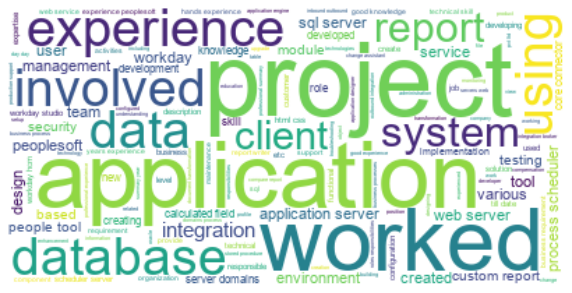

In [41]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Ensure cleanedSentences is a string; join if it's a list
if isinstance(cleanedSentences, list):
    cleanedSentences = " ".join(cleanedSentences)

# Generate the word cloud with enhancements
wc = WordCloud(
    background_color="white",
    colormap="viridis",
    stopwords=set(STOPWORDS),
    font_path="C:/Windows/Fonts/Arial.ttf"  # Adjust the path based on your OS
).generate(cleanedSentences)

# Display the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


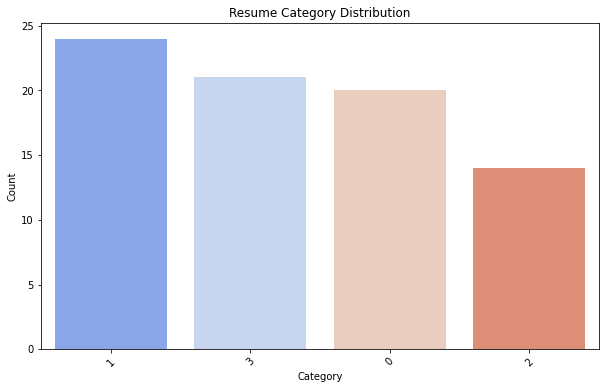

In [42]:
# Category Distribution
plt.figure(figsize=(10,6))
sns.countplot(data=resume_data, x='Category', palette='coolwarm', order=resume_data['Category'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Resume Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

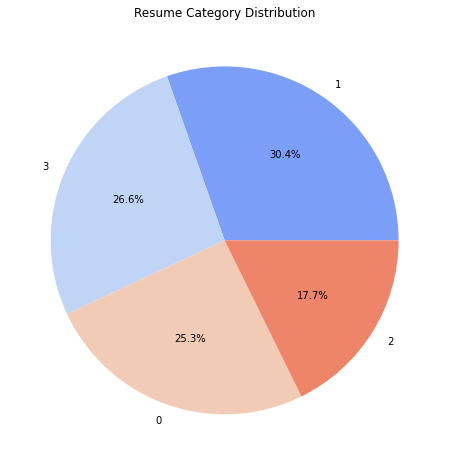

In [43]:
# Category Distribution - Pie Chart
plt.figure(figsize=(8,8))
resume_data['Category'].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("coolwarm", len(resume_data['Category'].unique())))
plt.title("Resume Category Distribution")
plt.ylabel("")
plt.show()

In [44]:
from collections import Counter

def get_top_words(category, n):
    text = " ".join(resume_data[resume_data['Category'] == category]['Resume_Details'].dropna())
    words = text.split()
    common_words = Counter(words).most_common(n)
    return common_words

# For testing
for cat in resume_data['Category'].unique():
    print(f"Most common words in {cat} resumes:")
    print(get_top_words(cat, 10))
    print("\n")

Most common words in 0 resumes:
[('peoplesoft', 411), ('application', 295), ('server', 238), ('experience', 226), ('database', 160), ('servers', 146), ('process', 142), ('people', 127), ('project', 114), ('web', 113)]


Most common words in 1 resumes:
[('react', 132), ('experience', 89), ('html', 84), ('using', 80), ('project', 75), ('css', 74), ('web', 72), ('javascript', 59), ('knowledge', 58), ('developer', 58)]


Most common words in 2 resumes:
[('sql', 200), ('data', 112), ('experience', 98), ('server', 95), ('using', 80), ('functions', 60), ('reports', 58), ('database', 53), ('project', 50), ('tables', 48)]


Most common words in 3 resumes:
[('workday', 392), ('integrations', 187), ('business', 181), ('reports', 175), ('experience', 162), ('using', 147), ('eib', 125), ('worked', 110), ('core', 109), ('hcm', 106)]




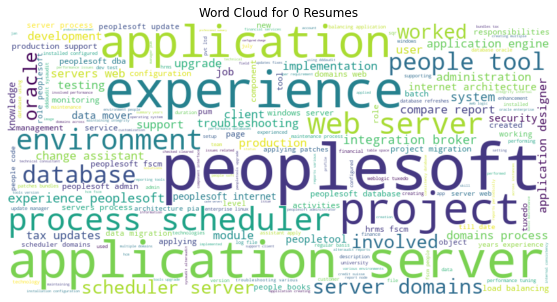

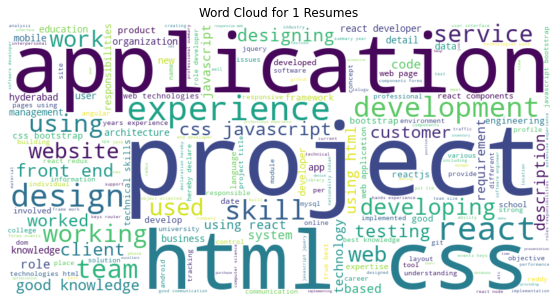

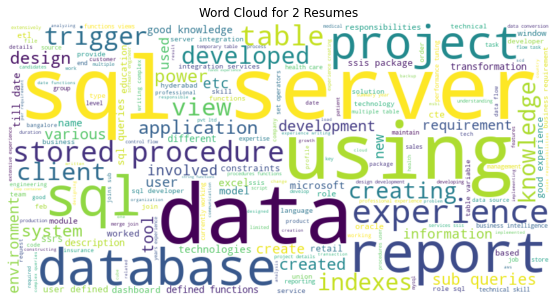

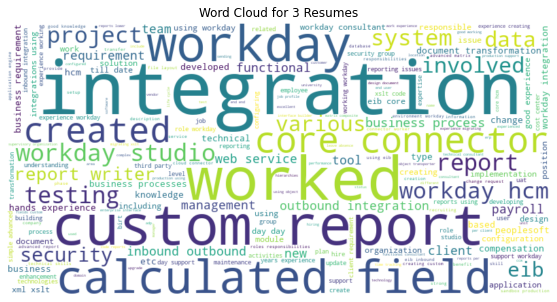

In [45]:
# WordCloud for each category
for cat in resume_data['Category'].unique():
    text = " ".join(resume_data[resume_data['Category'] == cat]['Resume_Details'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {cat} Resumes")
    plt.show()

## Model Building and Evaluation

In [46]:
!pip install tensorflow
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


  Using cached typing_extensions-4.5.0-py3-none-any.whl.metadata (8.5 kB)
Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2


ERROR: Exception:
Traceback (most recent call last):
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 106, in _run_wrapper
    status = _inner_run()
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 97, in _inner_run
    return self.run(options, args)
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 484, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_vendor\packaging\version.py", line 56, in parse
    return Version(version)
  File "c:\users\revat\anaconda3\lib\site-packages

## Feature Extraction using TF-IDF

In [47]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(resume_data['Resume_Details'], resume_data['Category'], 
                                                    test_size=0.2, random_state=42, stratify=resume_data['Category'])


In [48]:
# Feature Extraction
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


## Hyperparamter Tuning 

In [49]:
## SVM
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(SVC(), svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X_train_tfidf, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [50]:
## Random Forest
rf_params = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train_tfidf, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [51]:
## Naive Bayes
b_params = {'alpha': [0.1, 0.5, 1.0]}
b_grid = GridSearchCV(MultinomialNB(), b_params, cv=5, scoring='accuracy')
b_grid.fit(X_train_tfidf, y_train)


GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0]}, scoring='accuracy')

In [52]:
## KNN
knn_params = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train_tfidf, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [53]:
## Decision Tree
dt_params = {'max_depth': [10, 20, None], 'criterion': ['gini', 'entropy']}
dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_train_tfidf, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, None]},
             scoring='accuracy')

In [54]:
## Bagging
bagging_params = {'n_estimators': [10, 50, 100]}
bagging_grid = GridSearchCV(BaggingClassifier(), bagging_params, cv=5, scoring='accuracy')
bagging_grid.fit(X_train_tfidf, y_train)


GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'n_estimators': [10, 50, 100]}, scoring='accuracy')

In [55]:
## AdaBoost
adaboost_params = {'n_estimators': [50, 100, 200]}
adaboost_grid = GridSearchCV(AdaBoostClassifier(), adaboost_params, cv=5, scoring='accuracy')
adaboost_grid.fit(X_train_tfidf, y_train)


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [50, 100, 200]}, scoring='accuracy')

## Deep Learning Model(LSTM)

In [56]:
max_words = 5000
max_len = 200
tokenizer = Tokenizer(num_words=max_words, lower=True)
tokenizer.fit_on_texts(resume_data['Resume_Details'])
X_seq = tokenizer.texts_to_sequences(resume_data['Resume_Details'])
X_pad = pad_sequences(X_seq, maxlen=max_len)
y_encoded = LabelEncoder().fit_transform(resume_data['Category'])
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_pad, y_encoded, test_size=0.2, random_state=42)

lstm_model = Sequential([
    Embedding(max_words, 100, input_length=max_len),
    SpatialDropout1D(0.2),
    LSTM(100, dropout=0.2, recurrent_dropout=0.2),
    Dense(len(set(y_encoded)), activation='softmax')
])

lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=5, batch_size=32, validation_data=(X_test_lstm, y_test_lstm))

lstm_accuracy = lstm_model.evaluate(X_test_lstm, y_test_lstm)[1]
print(f"LSTM Model Accuracy: {lstm_accuracy}")


Epoch 1/5
2/2 [==============================] - 8s 1s/step - loss: 1.3858 - accuracy: 0.2222 - val_loss: 1.3796 - val_accuracy: 0.3750
Epoch 2/5
2/2 [==============================] - 1s 533ms/step - loss: 1.3757 - accuracy: 0.4603 - val_loss: 1.3739 - val_accuracy: 0.4375
Epoch 3/5
2/2 [==============================] - 1s 556ms/step - loss: 1.3621 - accuracy: 0.6508 - val_loss: 1.3684 - val_accuracy: 0.5000
Epoch 4/5
2/2 [==============================] - 1s 618ms/step - loss: 1.3495 - accuracy: 0.6190 - val_loss: 1.3615 - val_accuracy: 0.4375
Epoch 5/5
1/1 [==============================] - 0s 107ms/step - loss: 1.3533 - accuracy: 0.4375
LSTM Model Accuracy: 0.4375


## Model Training

In [57]:
models = {
    "Naive Bayes": MultinomialNB(**b_grid.best_params_),
    "SVM": SVC(**svm_grid.best_params_),
    "Random Forest": RandomForestClassifier(**rf_grid.best_params_),
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(**knn_grid.best_params_),
    "Decision Tree": DecisionTreeClassifier(**dt_grid.best_params_),
    "Bagging": BaggingClassifier(**bagging_grid.best_params_),
    "AdaBoost": AdaBoostClassifier(**adaboost_grid.best_params_)
}

best_model = None
best_model_name = ""
best_test_accuracy = 0

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    train_preds = model.predict(X_train_tfidf)
    test_preds = model.predict(X_test_tfidf)
    
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    
    print(f"{name} Performance:\n", classification_report(y_test, test_preds))
    
    # Avoid models that overfit (train accuracy = 1.0, test accuracy = 1.0)
    if test_accuracy > best_test_accuracy and not (train_accuracy == 1.0 and test_accuracy == 1.0):
        best_test_accuracy = test_accuracy
        best_model = model
        best_model_name = name

print(f"Best Model: {best_model_name} with Test Accuracy: {best_test_accuracy}")


Naive Bayes Performance:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.80      0.89         5
           2       1.00      1.00      1.00         3
           3       0.80      1.00      0.89         4

    accuracy                           0.94        16
   macro avg       0.95      0.95      0.94        16
weighted avg       0.95      0.94      0.94        16

SVM Performance:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

Random Forest Performance:
               precision    recall  f1-score   support

   

In [58]:
train_accuracies = []
test_accuracies = []
model_names = list(models.keys())

print("Final Model Accuracies:")
for name, model in models.items():
    train_preds = model.predict(X_train_tfidf)
    test_preds = model.predict(X_test_tfidf)
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
    print(f"{name}: Train Accuracy = {train_accuracy}, Test Accuracy = {test_accuracy}")


Final Model Accuracies:
Naive Bayes: Train Accuracy = 1.0, Test Accuracy = 0.9375
SVM: Train Accuracy = 1.0, Test Accuracy = 1.0
Random Forest: Train Accuracy = 1.0, Test Accuracy = 1.0
Logistic Regression: Train Accuracy = 1.0, Test Accuracy = 1.0
KNN: Train Accuracy = 1.0, Test Accuracy = 0.9375
Decision Tree: Train Accuracy = 1.0, Test Accuracy = 0.9375
Bagging: Train Accuracy = 1.0, Test Accuracy = 1.0
AdaBoost: Train Accuracy = 0.746031746031746, Test Accuracy = 0.75


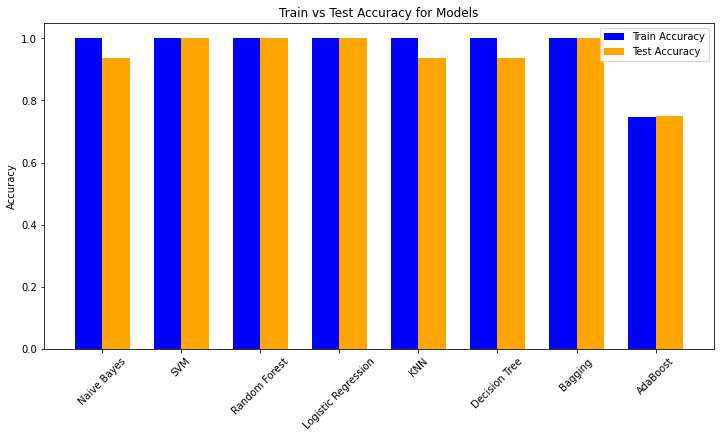

In [59]:
# Plot Train vs Test Accuracy
bar_width = 0.35
x = np.arange(len(model_names))

plt.figure(figsize=(12,6))
plt.bar(x - bar_width/2, train_accuracies, bar_width, label='Train Accuracy', color='blue')
plt.bar(x + bar_width/2, test_accuracies, bar_width, label='Test Accuracy', color='orange')
plt.xticks(x, model_names, rotation=45)
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy for Models')
plt.legend()
plt.show()


##  Function to Predict Resume Category

In [60]:
# Function to Predict Resume Category using Best Model with User Input
def predict_resume_category():
    resume_text = input("Enter resume details: ")
    text_transformed = vectorizer.transform([resume_text])
    prediction = best_model.predict(text_transformed)
    print("Predicted Category:", prediction[0])

# User Input Prediction
predict_resume_category()


Enter resume details: sql
Predicted Category: 2


In [61]:
import pickle
with open("resume_classifier.pkl", "wb") as f:
    pickle.dump(best_model, f)


In [62]:
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

In [63]:
import warnings
warnings.filterwarnings("ignore")
!pip install streamlit pandas numpy joblib scikit-learn pymupdf python-docx comtypes pyngrok

streamlit_code = """
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import fitz  # PyMuPDF for PDF processing
import docx
import re
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')

# Load the trained model and vectorizer
model = joblib.load('resume_classifier.pkl')
vectorizer = joblib.load('vectorizer.pkl')

# Category mapping
category_mapping = {
    'Peoplesoft Resume': 0,
    'React Developer': 1,
    'SQL Developer': 2,
    'workday': 3
}

# Reverse mapping for prediction output
reverse_category_mapping = {v: k for k, v in category_mapping.items()}

# Page Configuration
st.set_page_config(page_title="Resume Classifier", layout="wide", page_icon="📄")

# Custom CSS for Styling
st.markdown(\"""
    <style>
    .main {
        background-color: #f8f9fa;
        padding: 20px;
        border-radius: 10px;
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
    }
    .stButton > button {
        background-color: #007BFF;
        color: white;
        border-radius: 8px;
        padding: 10px 24px;
        border: none;
    }
    .stButton > button:hover {
        background-color: #0056b3;
    }
    </style>
\""", unsafe_allow_html=True)

# Title and Description
st.title("📄 Resume Classification App")
st.markdown(\"""
### Upload a resume and get classification results instantly!
Supports **PDF, DOCX, and DOC** formats.
\""")

# Function to extract text from uploaded file
def extract_text(file):
    \"""Extracts text from PDF, DOCX, or DOC files.\"""
    if file.type == "application/pdf":
        pdf_reader = fitz.open(stream=file.read(), filetype="pdf")
        text = "\\n".join([page.get_text("text") for page in pdf_reader])
    elif file.type == "application/vnd.openxmlformats-officedocument.wordprocessingml.document":  # DOCX
        doc = docx.Document(file)
        text = "\\n".join([para.text for para in doc.paragraphs])
    elif file.type == "application/msword":  # DOC
        text = extract_text_from_doc(file)
    else:
        text = ""  # Unsupported format
    return text

def extract_text_from_doc(file):
    \"""Extracts text from a DOC file (Windows-only, requires Microsoft Word).\"""
    try:
        import comtypes.client
        word = comtypes.client.CreateObject("Word.Application")
        word.Visible = False
        doc = word.Documents.Open(file.name)
        text = doc.Content.Text
        doc.Close(False)
        word.Quit()
        return text
    except Exception as e:
        return f"Error processing DOC file: {e}"

# Preprocessing Function
def preprocess(text):
    text = str(text).lower()
    text = re.sub(r'<.*?>|http\\S+|\\d+', '', text)  # Remove HTML, URLs, and numbers
    
    tokenizer = RegexpTokenizer(r'\\w+')
    tokens = tokenizer.tokenize(text)

    stop_words = set(stopwords.words('english'))
    filtered_words = [w for w in tokens if len(w) > 2 and w not in stop_words]

    return " ".join(filtered_words)

# File Upload Section
uploaded_file = st.file_uploader("Upload your resume", type=["pdf", "docx", "doc"])

if uploaded_file:
    # Extract text
    resume_text = extract_text(uploaded_file)
    
    if resume_text:
        # Preprocess text
        cleaned_text = preprocess(resume_text)
        
        # Transform using the vectorizer
        transformed_text = vectorizer.transform([cleaned_text])
        
        # Make prediction
        prediction = model.predict(transformed_text)
        
        # Map prediction to category name
        category_name = reverse_category_mapping.get(prediction[0], "Unknown Category")
        
        # Display output
        st.markdown("### 🏆 Classification Result")
        st.success(f"The model predicts: **{category_name}**")
    else:
        st.error("Error: Unable to extract text from the uploaded file.")
"""

# Save the Streamlit app code into a Python file using UTF-8 encoding
with open('resume_classification_app.py', 'w', encoding='utf-8') as f:
    f.write(streamlit_code)

ERROR: Exception:
Traceback (most recent call last):
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 106, in _run_wrapper
    status = _inner_run()
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 97, in _inner_run
    return self.run(options, args)
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 484, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File "c:\users\revat\anaconda3\lib\site-packages\pip\_vendor\packaging\version.py", line 56, in parse
    return Version(version)
  File "c:\users\revat\anaconda3\lib\site-packages

  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
Using cached typing_extensions-4.12.2-py3-none-any.whl (37 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
